In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import datetime
from pandas.io.data import DataReader
import kagglegym
with pd.HDFStore("../input/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

/Users/jingguo/anaconda/lib/python3.5/site-packages/pandas/io/data.py:35: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [3]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

with pd.HDFStore('../input/train.h5') as train:
    df = train.get('train')

In [5]:
market_df = df[['timestamp', 'y']].groupby('timestamp').agg([np.mean, np.std, len]).reset_index()
market_df.head()

timestamp         y                 
                 mean       std    len
0         0 -0.001870  0.026646  750.0
1         1  0.000501  0.028422  750.0
2         2 -0.005787  0.029281  750.0
3         3  0.001633  0.025333  750.0
4         4 -0.004309  0.035929  750.0

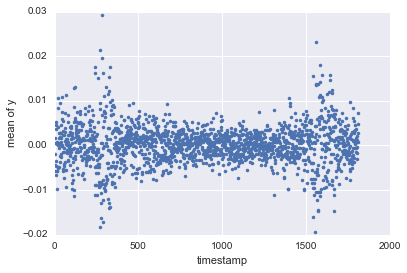

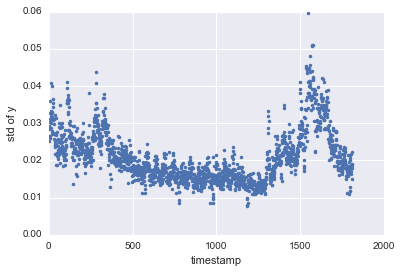

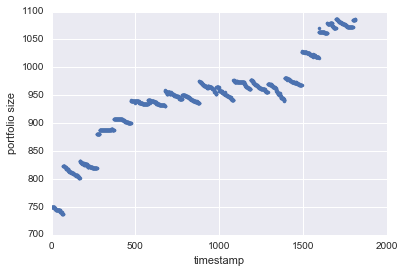

In [6]:
t      = market_df['timestamp']
y_mean = np.array(market_df['y']['mean'])
y_std  = np.array(market_df['y']['std'])
n      = np.array(market_df['y']['len'])

plt.figure()
plt.plot(t, y_mean, '.')
plt.xlabel('timestamp')
plt.ylabel('mean of y')

plt.figure()
plt.plot(t, y_std, '.')
plt.xlabel('timestamp')
plt.ylabel('std of y')

plt.figure()
plt.plot(t, n, '.')
plt.xlabel('timestamp')
plt.ylabel('portfolio size')

In [7]:
simple_ret = y_mean # this is a vector of the mean of asset returns for each timestamp
cum_ret = np.log(1+simple_ret).cumsum()

In [8]:
portfolio_mean = np.mean(cum_ret)
portfolio_std = np.std(cum_ret)
print("portfolio mean periodic return: " + str(portfolio_mean))
print("portfolio std dev of periodic returns: " + str(portfolio_std))

portfolio mean periodic return: 0.183126
portfolio std dev of periodic returns: 0.0922067


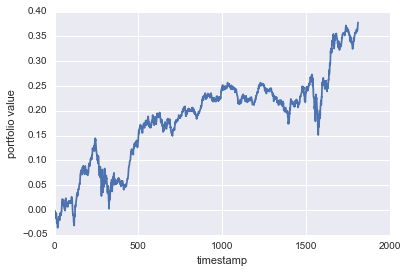

In [9]:
plt.figure()
plt.plot(t, cum_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

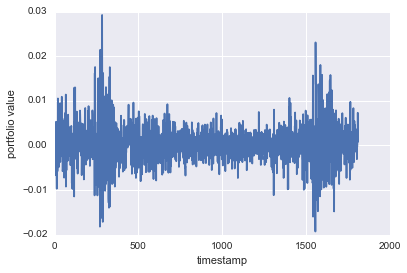

In [10]:
plt.figure()
plt.plot(t, simple_ret)
plt.xlabel('timestamp')
plt.ylabel('portfolio value')

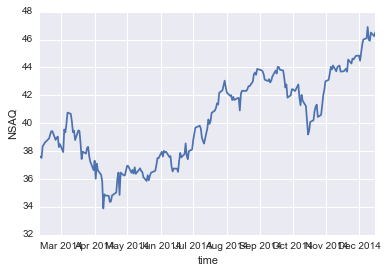

In [93]:
plt.figure()
plt.plot(ndaq.Open)
plt.xlabel('time')
plt.ylabel('NSAQ')

In [12]:
start = datetime.datetime(2014, 2, 10)
end = datetime.datetime(2014, 12, 16)
ndaq = DataReader("NDAQ", "yahoo", start, end)
sp=DataReader("^GSPC","yahoo",start,end)
dow=DataReader("^DJI","yahoo",start,end)

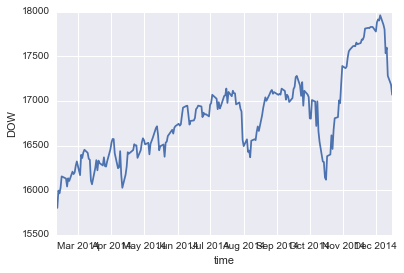

In [13]:
plt.figure()
plt.plot(dow.Close)
plt.xlabel('time')
plt.ylabel('DOW')

In [30]:
dow_return=np.diff(dow.Close)/dow.Close[0:-1]

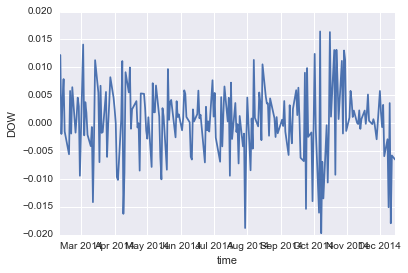

In [31]:
plt.figure()
plt.plot(dow_return)
plt.xlabel('time')
plt.ylabel('DOW')

In [71]:
print(len(cum_ret))
print(len(ndaq))

1813
216


In [36]:
newCumRet=cum_ret[range(0,216*8,8)]
newSimRet=simple_ret[range(8,216*8,8)]

In [53]:
np.corrcoef(newCumRet,ndaq.Close)

array([[ 1.        ,  0.74029855],
       [ 0.74029855,  1.        ]])

In [65]:
np.corrcoef(newCumRet,sp.Close)

array([[ 1.        ,  0.84148237],
       [ 0.84148237,  1.        ]])

In [70]:
np.corrcoef(newCumRet,dow.Close)

array([[ 1.        ,  0.77123959],
       [ 0.77123959,  1.        ]])

In [37]:
np.corrcoef(newSimRet,dow_return)

array([[ 1.        ,  0.04049489],
       [ 0.04049489,  1.        ]])

In [45]:
np.corrcoef(dow_return[1:],dow_return[0:-1])

array([[ 1.        , -0.10326103],
       [-0.10326103,  1.        ]])

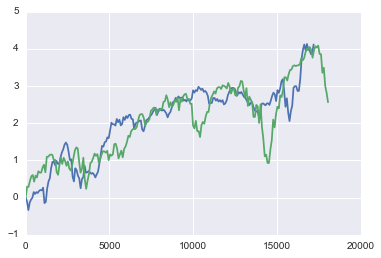

In [109]:
plt.figure
plt.plot(range(0,216*80,80),(newCumRet-newCumRet[0])/std(newCumRet),range(0,216*84,84),
         (sp.Close-sp.Close[0])/std(sp.Close))

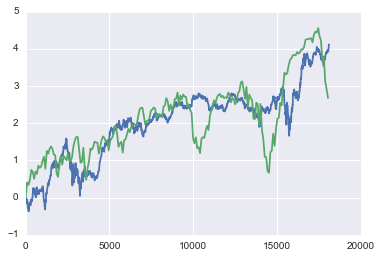

In [110]:
plt.figure
plt.plot(range(0,1813*10,10),(cum_ret-cum_ret[0])/std(cum_ret),range(0,216*84,84),
         (dow.Close-dow.Close[0])/std(dow.Close))